In [1]:
# Harness constants

data_folder = "./data"
dataset_name = "wine.data"

In [2]:
# Basic imports

import pandas as pd
import numpy as np

In [11]:
# Import the data

data_names = ["class","alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280_od315_of_diluted_wines","proline"]
data_delimiter = ','

data = pd.read_csv(data_folder + "/" + dataset_name, delimiter=data_delimiter, names=data_names)

data

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
#
# 2. Prepare the Data
#

# 
# Data Analysis
# 

import matplotlib.pyplot as plt

def plot_attribute(dataset_name, attribute_name, rows, column, colors):
    plt.title(dataset_name + " dataset: " + attribute_name)
    plt.scatter(rows, column, color=colors)

plot_color_map = {1:"red", 2: "blue", 3: "green"}

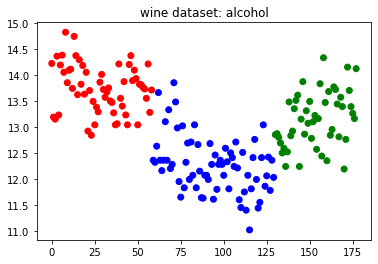

In [23]:
plot_attribute_name = "alcohol" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

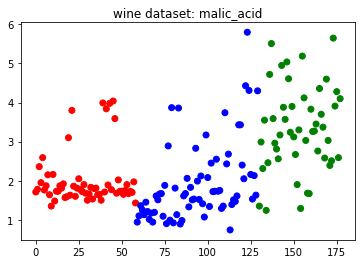

In [24]:
plot_attribute_name = "malic_acid" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

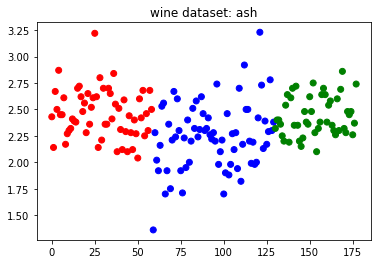

In [25]:
plot_attribute_name = "ash" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

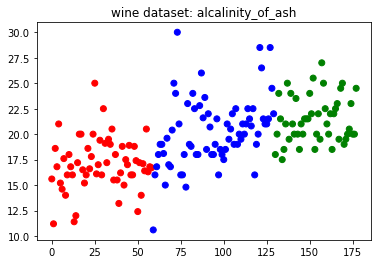

In [26]:
plot_attribute_name = "alcalinity_of_ash" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

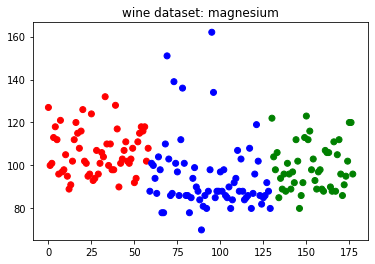

In [27]:
plot_attribute_name = "magnesium" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

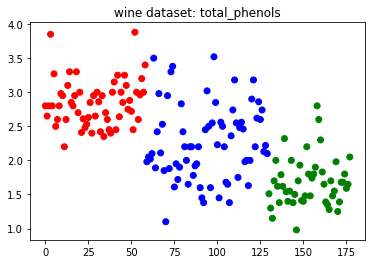

In [28]:
plot_attribute_name = "total_phenols" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

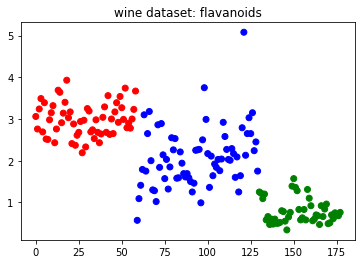

In [29]:
plot_attribute_name = "flavanoids" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

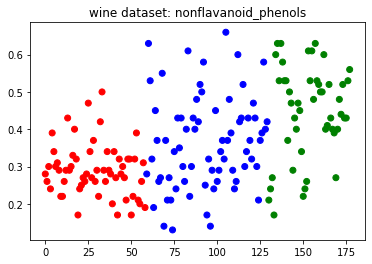

In [30]:
plot_attribute_name = "nonflavanoid_phenols" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

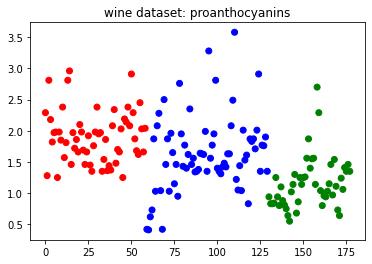

In [31]:
plot_attribute_name = "proanthocyanins" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

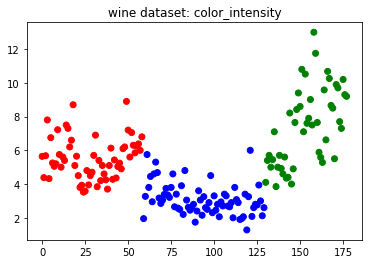

In [32]:
plot_attribute_name = "color_intensity" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

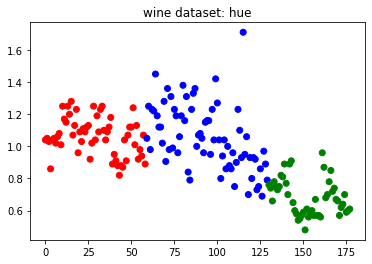

In [33]:
plot_attribute_name = "hue" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

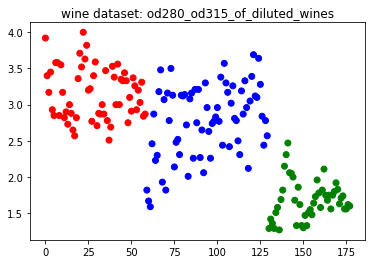

In [34]:
plot_attribute_name = "od280_od315_of_diluted_wines" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

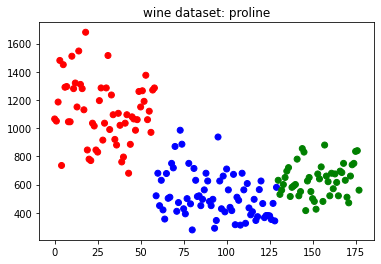

In [35]:
plot_attribute_name = "proline" 
plot_attribute("wine", plot_attribute_name, data.index, data[plot_attribute_name], data["class"].map(plot_color_map))

In [134]:
# Data preprocessing
# Split into X and Y (in and out)

# Convert df to np
data_numpy = data.to_numpy()

X = data_numpy[:,1:14].astype("float")
Y = data_numpy[:,0].astype("int") # we know they're just classes.

#
# Dataset experiments
#

# 1. All columns (leave all commented)

# 2. No ash
#X = np.delete(X, 3, 1)

# 3. No nonflavanoid_phenol
X = np.delete(X, 8, 1)

# 4. No ash nor nonflavanoid_phenol
#X = np.delete(X, 3, 1)
#X = np.delete(X, 7, 1)

In [135]:
# Scale the values in X

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X_scaled = scaler.fit_transform(X)

In [136]:
# Execute One Hot Encoding for our output vector

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)
Y_dummy = to_categorical(Y_encoded)

In [137]:
#
# 3. Model Testing
#

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_dim_rows, input_dim_cols = X_scaled.shape

def baseline_model():
    model = Sequential()
    
    model.add(Dense(10, input_dim=input_dim_cols, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [138]:
# Utilize the model with KerasClassifier and KFold cross validation

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

batch_size = 5

estimator = KerasClassifier(build_fn= baseline_model, epochs=200, batch_size=batch_size)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True)

In [139]:
# Execute test

results = cross_val_score(estimator, X_scaled, Y_dummy, cv=kfold)

Epoch 1/200
32/32 [==============================] - 0s 886us/step - loss: 1.1364 - accuracy: 0.2688
Epoch 2/200
32/32 [==============================] - 0s 932us/step - loss: 1.0172 - accuracy: 0.5250
Epoch 3/200
32/32 [==============================] - 0s 952us/step - loss: 0.9565 - accuracy: 0.6812
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.9086 - accuracy: 0.7188
Epoch 5/200
32/32 [==============================] - 0s 930us/step - loss: 0.8627 - accuracy: 0.7563
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.8191 - accuracy: 0.7750
Epoch 7/200
32/32 [==============================] - 0s 976us/step - loss: 0.7743 - accuracy: 0.8062
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7319 - accuracy: 0.8000
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.8313
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6499 - accuracy: 0.8313

32/32 [==============================] - 0s 846us/step - loss: 0.0838 - accuracy: 0.9812
Epoch 82/200
32/32 [==============================] - 0s 851us/step - loss: 0.0823 - accuracy: 0.9812
Epoch 83/200
32/32 [==============================] - 0s 873us/step - loss: 0.0814 - accuracy: 0.9812
Epoch 84/200
32/32 [==============================] - 0s 850us/step - loss: 0.0804 - accuracy: 0.9812
Epoch 85/200
32/32 [==============================] - 0s 829us/step - loss: 0.0790 - accuracy: 0.9812
Epoch 86/200
32/32 [==============================] - 0s 851us/step - loss: 0.0786 - accuracy: 0.9812
Epoch 87/200
32/32 [==============================] - 0s 893us/step - loss: 0.0766 - accuracy: 0.9812
Epoch 88/200
32/32 [==============================] - 0s 854us/step - loss: 0.0762 - accuracy: 0.9875
Epoch 89/200
32/32 [==============================] - 0s 881us/step - loss: 0.0750 - accuracy: 0.9875
Epoch 90/200
32/32 [==============================] - 0s 851us/step - loss: 0.0746 - accuracy: 

32/32 [==============================] - 0s 931us/step - loss: 0.0339 - accuracy: 0.9937
Epoch 161/200
32/32 [==============================] - 0s 870us/step - loss: 0.0336 - accuracy: 0.9937
Epoch 162/200
32/32 [==============================] - 0s 951us/step - loss: 0.0333 - accuracy: 0.9937
Epoch 163/200
32/32 [==============================] - 0s 896us/step - loss: 0.0330 - accuracy: 0.9937
Epoch 164/200
32/32 [==============================] - 0s 894us/step - loss: 0.0331 - accuracy: 0.9937
Epoch 165/200
32/32 [==============================] - 0s 893us/step - loss: 0.0324 - accuracy: 0.9937
Epoch 166/200
32/32 [==============================] - 0s 881us/step - loss: 0.0330 - accuracy: 0.9937
Epoch 167/200
32/32 [==============================] - 0s 905us/step - loss: 0.0315 - accuracy: 0.9937
Epoch 168/200
32/32 [==============================] - 0s 892us/step - loss: 0.0322 - accuracy: 0.9937
Epoch 169/200
32/32 [==============================] - 0s 878us/step - loss: 0.0314 - a

32/32 [==============================] - 0s 845us/step - loss: 0.2492 - accuracy: 0.9375
Epoch 40/200
32/32 [==============================] - 0s 866us/step - loss: 0.2423 - accuracy: 0.9438
Epoch 41/200
32/32 [==============================] - 0s 827us/step - loss: 0.2363 - accuracy: 0.9438
Epoch 42/200
32/32 [==============================] - 0s 919us/step - loss: 0.2315 - accuracy: 0.9375
Epoch 43/200
32/32 [==============================] - 0s 885us/step - loss: 0.2241 - accuracy: 0.9438
Epoch 44/200
32/32 [==============================] - 0s 852us/step - loss: 0.2207 - accuracy: 0.9375
Epoch 45/200
32/32 [==============================] - 0s 852us/step - loss: 0.2141 - accuracy: 0.9375
Epoch 46/200
32/32 [==============================] - 0s 869us/step - loss: 0.2091 - accuracy: 0.9375
Epoch 47/200
32/32 [==============================] - 0s 841us/step - loss: 0.2049 - accuracy: 0.9438
Epoch 48/200
32/32 [==============================] - 0s 844us/step - loss: 0.2002 - accuracy: 

32/32 [==============================] - 0s 953us/step - loss: 0.0647 - accuracy: 0.9875
Epoch 120/200
32/32 [==============================] - 0s 984us/step - loss: 0.0637 - accuracy: 0.9875
Epoch 121/200
32/32 [==============================] - 0s 940us/step - loss: 0.0632 - accuracy: 0.9875
Epoch 122/200
32/32 [==============================] - 0s 914us/step - loss: 0.0620 - accuracy: 0.9875
Epoch 123/200
32/32 [==============================] - 0s 897us/step - loss: 0.0622 - accuracy: 0.9875
Epoch 124/200
32/32 [==============================] - 0s 897us/step - loss: 0.0609 - accuracy: 0.9875
Epoch 125/200
32/32 [==============================] - 0s 874us/step - loss: 0.0606 - accuracy: 0.9875
Epoch 126/200
32/32 [==============================] - 0s 893us/step - loss: 0.0601 - accuracy: 0.9875
Epoch 127/200
32/32 [==============================] - 0s 915us/step - loss: 0.0602 - accuracy: 0.9875
Epoch 128/200
32/32 [==============================] - 0s 905us/step - loss: 0.0597 - a

32/32 [==============================] - 0s 850us/step - loss: 0.0295 - accuracy: 1.0000
Epoch 199/200
32/32 [==============================] - 0s 891us/step - loss: 0.0294 - accuracy: 1.0000
Epoch 200/200
4/4 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9444
Epoch 1/200
32/32 [==============================] - 0s 895us/step - loss: 1.0914 - accuracy: 0.3375
Epoch 2/200
32/32 [==============================] - 0s 910us/step - loss: 1.0457 - accuracy: 0.3187
Epoch 3/200
32/32 [==============================] - 0s 887us/step - loss: 0.9986 - accuracy: 0.3812
Epoch 4/200
32/32 [==============================] - 0s 861us/step - loss: 0.9551 - accuracy: 0.5375
Epoch 5/200
32/32 [==============================] - 0s 848us/step - loss: 0.9013 - accuracy: 0.6375
Epoch 6/200
32/32 [==============================] - 0s 912us/step - loss: 0.8452 - accuracy: 0.6625
Epoch 7/200
32/32 [==============================] - 0s 906us/step - loss: 0.8007 - accuracy: 0.6938
Ep

32/32 [==============================] - 0s 831us/step - loss: 0.0948 - accuracy: 0.9875
Epoch 78/200
32/32 [==============================] - 0s 895us/step - loss: 0.0940 - accuracy: 0.9875
Epoch 79/200
32/32 [==============================] - 0s 882us/step - loss: 0.0926 - accuracy: 0.9875
Epoch 80/200
32/32 [==============================] - 0s 852us/step - loss: 0.0920 - accuracy: 0.9875
Epoch 81/200
32/32 [==============================] - 0s 938us/step - loss: 0.0901 - accuracy: 0.9875
Epoch 82/200
32/32 [==============================] - 0s 836us/step - loss: 0.0883 - accuracy: 0.9875
Epoch 83/200
32/32 [==============================] - 0s 885us/step - loss: 0.0865 - accuracy: 0.9875
Epoch 84/200
32/32 [==============================] - 0s 908us/step - loss: 0.0865 - accuracy: 0.9875
Epoch 85/200
32/32 [==============================] - 0s 901us/step - loss: 0.0843 - accuracy: 0.9875
Epoch 86/200
32/32 [==============================] - 0s 871us/step - loss: 0.0834 - accuracy: 

Epoch 157/200
32/32 [==============================] - 0s 899us/step - loss: 0.0373 - accuracy: 0.9937
Epoch 158/200
32/32 [==============================] - 0s 869us/step - loss: 0.0369 - accuracy: 0.9937
Epoch 159/200
32/32 [==============================] - 0s 944us/step - loss: 0.0364 - accuracy: 0.9937
Epoch 160/200
32/32 [==============================] - 0s 905us/step - loss: 0.0358 - accuracy: 0.9937
Epoch 161/200
32/32 [==============================] - 0s 869us/step - loss: 0.0353 - accuracy: 0.9937
Epoch 162/200
32/32 [==============================] - 0s 899us/step - loss: 0.0351 - accuracy: 0.9937
Epoch 163/200
32/32 [==============================] - 0s 869us/step - loss: 0.0352 - accuracy: 0.9937
Epoch 164/200
32/32 [==============================] - 0s 833us/step - loss: 0.0345 - accuracy: 0.9937
Epoch 165/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9937
Epoch 166/200
32/32 [==============================] - 0s 925us/step - loss

32/32 [==============================] - 0s 929us/step - loss: 0.1873 - accuracy: 0.9750
Epoch 37/200
32/32 [==============================] - 0s 960us/step - loss: 0.1802 - accuracy: 0.9750
Epoch 38/200
32/32 [==============================] - 0s 897us/step - loss: 0.1739 - accuracy: 0.9812
Epoch 39/200
32/32 [==============================] - 0s 959us/step - loss: 0.1691 - accuracy: 0.9750
Epoch 40/200
32/32 [==============================] - 0s 992us/step - loss: 0.1645 - accuracy: 0.9750
Epoch 41/200
32/32 [==============================] - 0s 926us/step - loss: 0.1600 - accuracy: 0.9812
Epoch 42/200
32/32 [==============================] - 0s 928us/step - loss: 0.1562 - accuracy: 0.9750
Epoch 43/200
32/32 [==============================] - 0s 884us/step - loss: 0.1507 - accuracy: 0.9875
Epoch 44/200
32/32 [==============================] - 0s 941us/step - loss: 0.1477 - accuracy: 0.9750
Epoch 45/200
32/32 [==============================] - 0s 903us/step - loss: 0.1451 - accuracy: 

32/32 [==============================] - 0s 901us/step - loss: 0.0458 - accuracy: 0.9937
Epoch 117/200
32/32 [==============================] - 0s 866us/step - loss: 0.0457 - accuracy: 0.9937
Epoch 118/200
32/32 [==============================] - 0s 926us/step - loss: 0.0447 - accuracy: 0.9937
Epoch 119/200
32/32 [==============================] - 0s 975us/step - loss: 0.0450 - accuracy: 0.9937
Epoch 120/200
32/32 [==============================] - 0s 979us/step - loss: 0.0440 - accuracy: 0.9937
Epoch 121/200
32/32 [==============================] - 0s 852us/step - loss: 0.0439 - accuracy: 0.9937
Epoch 122/200
32/32 [==============================] - 0s 879us/step - loss: 0.0439 - accuracy: 0.9937
Epoch 123/200
32/32 [==============================] - 0s 828us/step - loss: 0.0425 - accuracy: 0.9937
Epoch 124/200
32/32 [==============================] - 0s 832us/step - loss: 0.0412 - accuracy: 0.9937
Epoch 125/200
32/32 [==============================] - 0s 878us/step - loss: 0.0407 - a

32/32 [==============================] - 0s 894us/step - loss: 0.0177 - accuracy: 1.0000
Epoch 196/200
32/32 [==============================] - 0s 862us/step - loss: 0.0177 - accuracy: 1.0000
Epoch 197/200
32/32 [==============================] - 0s 919us/step - loss: 0.0173 - accuracy: 1.0000
Epoch 198/200
32/32 [==============================] - 0s 908us/step - loss: 0.0175 - accuracy: 1.0000
Epoch 199/200
32/32 [==============================] - 0s 877us/step - loss: 0.0172 - accuracy: 1.0000
Epoch 200/200
4/4 [==============================] - 0s 1ms/step - loss: 0.0805 - accuracy: 0.9444
Epoch 1/200
32/32 [==============================] - 0s 871us/step - loss: 1.1385 - accuracy: 0.1937
Epoch 2/200
32/32 [==============================] - 0s 895us/step - loss: 1.0876 - accuracy: 0.3000
Epoch 3/200
32/32 [==============================] - 0s 917us/step - loss: 1.0377 - accuracy: 0.4437
Epoch 4/200
32/32 [==============================] - 0s 886us/step - loss: 0.9924 - accuracy: 0.5

32/32 [==============================] - 0s 857us/step - loss: 0.1071 - accuracy: 0.9812
Epoch 75/200
32/32 [==============================] - 0s 835us/step - loss: 0.1051 - accuracy: 0.9812
Epoch 76/200
32/32 [==============================] - 0s 867us/step - loss: 0.1054 - accuracy: 0.9812
Epoch 77/200
32/32 [==============================] - 0s 863us/step - loss: 0.1022 - accuracy: 0.9812
Epoch 78/200
32/32 [==============================] - 0s 845us/step - loss: 0.1010 - accuracy: 0.9812
Epoch 79/200
32/32 [==============================] - 0s 882us/step - loss: 0.0998 - accuracy: 0.9812
Epoch 80/200
32/32 [==============================] - 0s 850us/step - loss: 0.0982 - accuracy: 0.9812
Epoch 81/200
32/32 [==============================] - 0s 844us/step - loss: 0.0967 - accuracy: 0.9875
Epoch 82/200
32/32 [==============================] - 0s 837us/step - loss: 0.0949 - accuracy: 0.9812
Epoch 83/200
32/32 [==============================] - 0s 874us/step - loss: 0.0942 - accuracy: 

32/32 [==============================] - 0s 847us/step - loss: 0.0420 - accuracy: 0.9875
Epoch 154/200
32/32 [==============================] - 0s 881us/step - loss: 0.0415 - accuracy: 0.9875
Epoch 155/200
32/32 [==============================] - 0s 917us/step - loss: 0.0411 - accuracy: 0.9875
Epoch 156/200
32/32 [==============================] - 0s 944us/step - loss: 0.0398 - accuracy: 0.9937
Epoch 157/200
32/32 [==============================] - 0s 894us/step - loss: 0.0401 - accuracy: 0.9875
Epoch 158/200
32/32 [==============================] - 0s 964us/step - loss: 0.0397 - accuracy: 0.9875
Epoch 159/200
32/32 [==============================] - 0s 853us/step - loss: 0.0400 - accuracy: 0.9937
Epoch 160/200
32/32 [==============================] - 0s 852us/step - loss: 0.0387 - accuracy: 0.9937
Epoch 161/200
32/32 [==============================] - 0s 909us/step - loss: 0.0383 - accuracy: 0.9937
Epoch 162/200
32/32 [==============================] - 0s 862us/step - loss: 0.0382 - a

32/32 [==============================] - 0s 850us/step - loss: 0.1981 - accuracy: 0.9688
Epoch 33/200
32/32 [==============================] - 0s 884us/step - loss: 0.1914 - accuracy: 0.9750
Epoch 34/200
32/32 [==============================] - 0s 840us/step - loss: 0.1843 - accuracy: 0.9750
Epoch 35/200
32/32 [==============================] - 0s 857us/step - loss: 0.1810 - accuracy: 0.9750
Epoch 36/200
32/32 [==============================] - 0s 844us/step - loss: 0.1723 - accuracy: 0.9750
Epoch 37/200
32/32 [==============================] - 0s 883us/step - loss: 0.1668 - accuracy: 0.9750
Epoch 38/200
32/32 [==============================] - 0s 888us/step - loss: 0.1619 - accuracy: 0.9750
Epoch 39/200
32/32 [==============================] - 0s 874us/step - loss: 0.1572 - accuracy: 0.9750
Epoch 40/200
32/32 [==============================] - 0s 876us/step - loss: 0.1528 - accuracy: 0.9750
Epoch 41/200
32/32 [==============================] - 0s 876us/step - loss: 0.1485 - accuracy: 

32/32 [==============================] - 0s 881us/step - loss: 0.0443 - accuracy: 1.0000
Epoch 113/200
32/32 [==============================] - 0s 888us/step - loss: 0.0439 - accuracy: 0.9937
Epoch 114/200
32/32 [==============================] - 0s 850us/step - loss: 0.0435 - accuracy: 0.9937
Epoch 115/200
32/32 [==============================] - 0s 860us/step - loss: 0.0430 - accuracy: 1.0000
Epoch 116/200
32/32 [==============================] - 0s 841us/step - loss: 0.0429 - accuracy: 0.9937
Epoch 117/200
32/32 [==============================] - 0s 879us/step - loss: 0.0419 - accuracy: 1.0000
Epoch 118/200
32/32 [==============================] - 0s 855us/step - loss: 0.0425 - accuracy: 0.9937
Epoch 119/200
32/32 [==============================] - 0s 844us/step - loss: 0.0404 - accuracy: 1.0000
Epoch 120/200
32/32 [==============================] - 0s 861us/step - loss: 0.0405 - accuracy: 1.0000
Epoch 121/200
32/32 [==============================] - 0s 851us/step - loss: 0.0405 - a

32/32 [==============================] - 0s 903us/step - loss: 0.0185 - accuracy: 1.0000
Epoch 192/200
32/32 [==============================] - 0s 951us/step - loss: 0.0186 - accuracy: 1.0000
Epoch 193/200
32/32 [==============================] - 0s 879us/step - loss: 0.0188 - accuracy: 1.0000
Epoch 194/200
32/32 [==============================] - 0s 884us/step - loss: 0.0180 - accuracy: 1.0000
Epoch 195/200
32/32 [==============================] - 0s 916us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 196/200
32/32 [==============================] - 0s 900us/step - loss: 0.0176 - accuracy: 1.0000
Epoch 197/200
32/32 [==============================] - 0s 844us/step - loss: 0.0178 - accuracy: 1.0000
Epoch 198/200
32/32 [==============================] - 0s 888us/step - loss: 0.0173 - accuracy: 1.0000
Epoch 199/200
32/32 [==============================] - 0s 848us/step - loss: 0.0176 - accuracy: 1.0000
Epoch 200/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0365 - accur

32/32 [==============================] - 0s 903us/step - loss: 0.1336 - accuracy: 0.9688
Epoch 71/200
32/32 [==============================] - 0s 875us/step - loss: 0.1321 - accuracy: 0.9750
Epoch 72/200
32/32 [==============================] - 0s 855us/step - loss: 0.1296 - accuracy: 0.9750
Epoch 73/200
32/32 [==============================] - 0s 845us/step - loss: 0.1270 - accuracy: 0.9750
Epoch 74/200
32/32 [==============================] - 0s 904us/step - loss: 0.1259 - accuracy: 0.9750
Epoch 75/200
32/32 [==============================] - 0s 843us/step - loss: 0.1233 - accuracy: 0.9688
Epoch 76/200
32/32 [==============================] - 0s 872us/step - loss: 0.1209 - accuracy: 0.9750
Epoch 77/200
32/32 [==============================] - 0s 848us/step - loss: 0.1188 - accuracy: 0.9750
Epoch 78/200
32/32 [==============================] - 0s 901us/step - loss: 0.1179 - accuracy: 0.9750
Epoch 79/200
32/32 [==============================] - 0s 881us/step - loss: 0.1154 - accuracy: 

Epoch 150/200
32/32 [==============================] - 0s 864us/step - loss: 0.0492 - accuracy: 0.9875
Epoch 151/200
32/32 [==============================] - 0s 864us/step - loss: 0.0491 - accuracy: 0.9875
Epoch 152/200
32/32 [==============================] - 0s 923us/step - loss: 0.0490 - accuracy: 0.9875
Epoch 153/200
32/32 [==============================] - 0s 888us/step - loss: 0.0476 - accuracy: 0.9875
Epoch 154/200
32/32 [==============================] - 0s 864us/step - loss: 0.0476 - accuracy: 0.9875
Epoch 155/200
32/32 [==============================] - 0s 854us/step - loss: 0.0466 - accuracy: 0.9875
Epoch 156/200
32/32 [==============================] - 0s 839us/step - loss: 0.0465 - accuracy: 0.9875
Epoch 157/200
32/32 [==============================] - 0s 830us/step - loss: 0.0459 - accuracy: 0.9875
Epoch 158/200
32/32 [==============================] - 0s 839us/step - loss: 0.0459 - accuracy: 0.9875
Epoch 159/200
32/32 [==============================] - 0s 844us/step - lo

32/32 [==============================] - 0s 819us/step - loss: 0.2516 - accuracy: 0.9500
Epoch 30/200
32/32 [==============================] - 0s 851us/step - loss: 0.2425 - accuracy: 0.9625
Epoch 31/200
32/32 [==============================] - 0s 874us/step - loss: 0.2345 - accuracy: 0.9625
Epoch 32/200
32/32 [==============================] - 0s 849us/step - loss: 0.2271 - accuracy: 0.9563
Epoch 33/200
32/32 [==============================] - 0s 853us/step - loss: 0.2195 - accuracy: 0.9625
Epoch 34/200
32/32 [==============================] - 0s 894us/step - loss: 0.2117 - accuracy: 0.9625
Epoch 35/200
32/32 [==============================] - 0s 855us/step - loss: 0.2061 - accuracy: 0.9625
Epoch 36/200
32/32 [==============================] - 0s 850us/step - loss: 0.1988 - accuracy: 0.9688
Epoch 37/200
32/32 [==============================] - 0s 865us/step - loss: 0.1928 - accuracy: 0.9688
Epoch 38/200
32/32 [==============================] - 0s 903us/step - loss: 0.1884 - accuracy: 

32/32 [==============================] - 0s 897us/step - loss: 0.0676 - accuracy: 0.9875
Epoch 110/200
32/32 [==============================] - 0s 938us/step - loss: 0.0669 - accuracy: 0.9875
Epoch 111/200
32/32 [==============================] - 0s 841us/step - loss: 0.0658 - accuracy: 0.9875
Epoch 112/200
32/32 [==============================] - 0s 854us/step - loss: 0.0651 - accuracy: 0.9875
Epoch 113/200
32/32 [==============================] - 0s 855us/step - loss: 0.0650 - accuracy: 0.9875
Epoch 114/200
32/32 [==============================] - 0s 857us/step - loss: 0.0639 - accuracy: 0.9875
Epoch 115/200
32/32 [==============================] - 0s 834us/step - loss: 0.0634 - accuracy: 0.9875
Epoch 116/200
32/32 [==============================] - 0s 856us/step - loss: 0.0636 - accuracy: 0.9875
Epoch 117/200
32/32 [==============================] - 0s 865us/step - loss: 0.0627 - accuracy: 0.9875
Epoch 118/200
32/32 [==============================] - 0s 863us/step - loss: 0.0620 - a

32/32 [==============================] - 0s 849us/step - loss: 0.0303 - accuracy: 1.0000
Epoch 189/200
32/32 [==============================] - 0s 843us/step - loss: 0.0301 - accuracy: 1.0000
Epoch 190/200
32/32 [==============================] - 0s 842us/step - loss: 0.0298 - accuracy: 1.0000
Epoch 191/200
32/32 [==============================] - 0s 845us/step - loss: 0.0296 - accuracy: 0.9937
Epoch 192/200
32/32 [==============================] - 0s 835us/step - loss: 0.0292 - accuracy: 1.0000
Epoch 193/200
32/32 [==============================] - 0s 880us/step - loss: 0.0292 - accuracy: 1.0000
Epoch 194/200
32/32 [==============================] - 0s 837us/step - loss: 0.0286 - accuracy: 1.0000
Epoch 195/200
32/32 [==============================] - 0s 845us/step - loss: 0.0281 - accuracy: 1.0000
Epoch 196/200
32/32 [==============================] - 0s 879us/step - loss: 0.0283 - accuracy: 0.9937
Epoch 197/200
32/32 [==============================] - 0s 854us/step - loss: 0.0277 - a

33/33 [==============================] - 0s 971us/step - loss: 0.1198 - accuracy: 0.9752
Epoch 68/200
33/33 [==============================] - 0s 890us/step - loss: 0.1173 - accuracy: 0.9752
Epoch 69/200
33/33 [==============================] - 0s 937us/step - loss: 0.1163 - accuracy: 0.9752
Epoch 70/200
33/33 [==============================] - 0s 883us/step - loss: 0.1156 - accuracy: 0.9814
Epoch 71/200
33/33 [==============================] - 0s 927us/step - loss: 0.1123 - accuracy: 0.9814
Epoch 72/200
33/33 [==============================] - 0s 913us/step - loss: 0.1109 - accuracy: 0.9814
Epoch 73/200
33/33 [==============================] - 0s 908us/step - loss: 0.1093 - accuracy: 0.9876
Epoch 74/200
33/33 [==============================] - 0s 919us/step - loss: 0.1086 - accuracy: 0.9814
Epoch 75/200
33/33 [==============================] - 0s 900us/step - loss: 0.1062 - accuracy: 0.9814
Epoch 76/200
33/33 [==============================] - 0s 891us/step - loss: 0.1046 - accuracy: 

33/33 [==============================] - 0s 893us/step - loss: 0.0464 - accuracy: 0.9938
Epoch 148/200
33/33 [==============================] - 0s 913us/step - loss: 0.0470 - accuracy: 0.9876
Epoch 149/200
33/33 [==============================] - 0s 905us/step - loss: 0.0458 - accuracy: 0.9876
Epoch 150/200
33/33 [==============================] - 0s 909us/step - loss: 0.0449 - accuracy: 0.9938
Epoch 151/200
33/33 [==============================] - 0s 910us/step - loss: 0.0450 - accuracy: 0.9938
Epoch 152/200
33/33 [==============================] - 0s 945us/step - loss: 0.0441 - accuracy: 0.9876
Epoch 153/200
33/33 [==============================] - 0s 908us/step - loss: 0.0434 - accuracy: 0.9938
Epoch 154/200
33/33 [==============================] - 0s 922us/step - loss: 0.0440 - accuracy: 0.9938
Epoch 155/200
33/33 [==============================] - 0s 887us/step - loss: 0.0443 - accuracy: 0.9938
Epoch 156/200
33/33 [==============================] - 0s 947us/step - loss: 0.0429 - a

33/33 [==============================] - 0s 920us/step - loss: 0.3095 - accuracy: 0.9503
Epoch 27/200
33/33 [==============================] - 0s 900us/step - loss: 0.2967 - accuracy: 0.9503
Epoch 28/200
33/33 [==============================] - 0s 901us/step - loss: 0.2834 - accuracy: 0.9503
Epoch 29/200
33/33 [==============================] - 0s 908us/step - loss: 0.2732 - accuracy: 0.9503
Epoch 30/200
33/33 [==============================] - 0s 904us/step - loss: 0.2629 - accuracy: 0.9503
Epoch 31/200
33/33 [==============================] - 0s 872us/step - loss: 0.2529 - accuracy: 0.9565
Epoch 32/200
33/33 [==============================] - 0s 901us/step - loss: 0.2456 - accuracy: 0.9503
Epoch 33/200
33/33 [==============================] - 0s 886us/step - loss: 0.2369 - accuracy: 0.9627
Epoch 34/200
33/33 [==============================] - 0s 902us/step - loss: 0.2286 - accuracy: 0.9627
Epoch 35/200
33/33 [==============================] - 0s 914us/step - loss: 0.2224 - accuracy: 

33/33 [==============================] - 0s 864us/step - loss: 0.0698 - accuracy: 0.9876
Epoch 107/200
33/33 [==============================] - 0s 909us/step - loss: 0.0686 - accuracy: 0.9876
Epoch 108/200
33/33 [==============================] - 0s 875us/step - loss: 0.0678 - accuracy: 0.9876
Epoch 109/200
33/33 [==============================] - 0s 932us/step - loss: 0.0671 - accuracy: 0.9876
Epoch 110/200
33/33 [==============================] - 0s 867us/step - loss: 0.0659 - accuracy: 0.9876
Epoch 111/200
33/33 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9876
Epoch 112/200
33/33 [==============================] - 0s 906us/step - loss: 0.0647 - accuracy: 0.9876
Epoch 113/200
33/33 [==============================] - 0s 945us/step - loss: 0.0646 - accuracy: 0.9876
Epoch 114/200
33/33 [==============================] - 0s 944us/step - loss: 0.0639 - accuracy: 0.9876
Epoch 115/200
33/33 [==============================] - 0s 906us/step - loss: 0.0635 - acc

33/33 [==============================] - 0s 885us/step - loss: 0.0341 - accuracy: 0.9938
Epoch 186/200
33/33 [==============================] - 0s 871us/step - loss: 0.0329 - accuracy: 0.9938
Epoch 187/200
33/33 [==============================] - 0s 907us/step - loss: 0.0322 - accuracy: 0.9938
Epoch 188/200
33/33 [==============================] - 0s 911us/step - loss: 0.0317 - accuracy: 0.9938
Epoch 189/200
33/33 [==============================] - 0s 898us/step - loss: 0.0317 - accuracy: 1.0000
Epoch 190/200
33/33 [==============================] - 0s 879us/step - loss: 0.0320 - accuracy: 0.9938
Epoch 191/200
33/33 [==============================] - 0s 908us/step - loss: 0.0316 - accuracy: 1.0000
Epoch 192/200
33/33 [==============================] - 0s 884us/step - loss: 0.0309 - accuracy: 1.0000
Epoch 193/200
33/33 [==============================] - 0s 872us/step - loss: 0.0313 - accuracy: 0.9938
Epoch 194/200
33/33 [==============================] - 0s 868us/step - loss: 0.0306 - a

In [140]:
# Print out results!
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 98.33% (2.55%)
